<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [111]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

In [112]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [113]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [114]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [115]:
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [116]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue](https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). Save the text of the response as a variable named `html_data`.


In [117]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Set the URL and headers
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

# Step 2: Fetch the HTML content
response = requests.get(url, headers=headers)
response.raise_for_status()  # Raise an HTTPError for bad responses

# Step 3: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Step 4: Extract the table data
table = soup.find("table", {"class": "historical_data_table table"})
rows = table.find_all("tr")

# Step 5: Convert the table data to a DataFrame
data = []
for row in rows[1:]:  # Skip the header row
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace(",", "").replace("$", "")
    data.append([date, revenue])

tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Step 6: Clean the DataFrame
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace("", pd.NA).dropna()
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(int)

# Display the cleaned DataFrame
print(tesla_revenue.head())

   Date  Revenue
0  2023    96773
1  2022    81462
2  2021    53823
3  2020    31536
4  2019    24578


Parse the html data using `beautiful_soup`.


In [118]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Set the URL and headers
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

# Step 2: Fetch the HTML content
response = requests.get(url, headers=headers)
response.raise_for_status()  # Raise an HTTPError for bad responses

# Step 3: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")
    
# Step 4: Extract the table data
table = soup.find("table", {"class": "historical_data_table table"})
rows = table.find_all("tr")



Using beautiful soup extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column. 


In [119]:

    
# Step 5: Convert the table data to a DataFrame
data = []

for row in rows[1:]:  # Skip the header row
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace(",", "").replace("$", "")
    data.append([date, revenue])
    
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Display the DataFrame
print(tesla_revenue.head())




   Date Revenue
0  2023   96773
1  2022   81462
2  2021   53823
3  2020   31536
4  2019   24578


<details><summary>Click here if you need help removing the dollar sign and comma</summary>

```
    
If you parsed the HTML table by row and column you can use the replace function on the string
    
    revenue = col[1].text.replace("$", "").replace(",", "")
    
If you use the read_html function you can use the replace function on the string representation of the column

    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")

```

</details>


Remove the rows in the dataframe that are empty strings or are NaN in the Revenue column. Print the entire `tesla_revenue` DataFrame to see if you have any.


In [120]:
tesla_revenue

,Date,Revenue
0,2023,96773
1,2022,81462
2,2021,53823
3,2020,31536
4,2019,24578
5,2018,21461
6,2017,11759
7,2016,7000
8,2015,4046
9,2014,3198


<details><summary>Click here if you need help removing the Nan or empty strings</summary>

```
    
If you have NaN in the Revenue column
    
    tesla_revenue.dropna(inplace=True)
    
If you have emtpty string in the Revenue column

    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

```

</details>


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [121]:
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

,Date,Revenue
10,2013,2013
11,2012,413
12,2011,204
13,2010,117
14,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [122]:
gamestop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [123]:
gme_data=gamestop.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [124]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue](https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork-23455606&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). Save the text of the response as a variable named `html_data`.


In [125]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"



Parse the html data using `beautiful_soup`.


In [126]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Set the URL and headers
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

# Step 2: Fetch the HTML content
response = requests.get(url, headers=headers)
response.raise_for_status()  # Raise an HTTPError for bad responses
    
# Step 3: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Step 4: Extract the table data
table = soup.find("table", {"class": "historical_data_table table"})
rows = table.find_all("tr")

# Step 5: Convert the table data to a DataFrame
data = []

for row in rows[1:]:  # Skip the header row
    cols = row.find_all("td")
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace(",", "").replace("$", "")
    data.append([date, revenue])
    
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Step 6: Clean the DataFrame
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace("", pd.NA).dropna()
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(int)

# Display the cleaned DataFrame
print(gme_revenue.head())
    
#

   Date  Revenue
0  2024     5273
1  2023     5927
2  2022     6011
3  2021     5090
4  2020     6466


Using beautiful soup extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


In [127]:
gme_revenue



,Date,Revenue
0,2024,5273
1,2023,5927
2,2022,6011
3,2021,5090
4,2020,6466
5,2019,8285
6,2018,8547
7,2017,7965
8,2016,9364
9,2015,9296


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [128]:
gme_revenue.tail()

#
#


,Date,Revenue
11,2013,8887
12,2012,9551
13,2011,9474
14,2010,9078
15,2009,8806


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`


In [129]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=0.3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data Graph')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`.


In [130]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Data Graph')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>


In [131]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Function to plot stock data using Matplotlib
def plot_stock_data(stock_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot stock data using Plotly
def plot_stock_data_plotly(stock_data, title):
    fig = go.Figure(data=[go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Close Price')])
    fig.update_layout(title=title, xaxis_title='Date', yaxis_title='Close Price')
    fig.show()

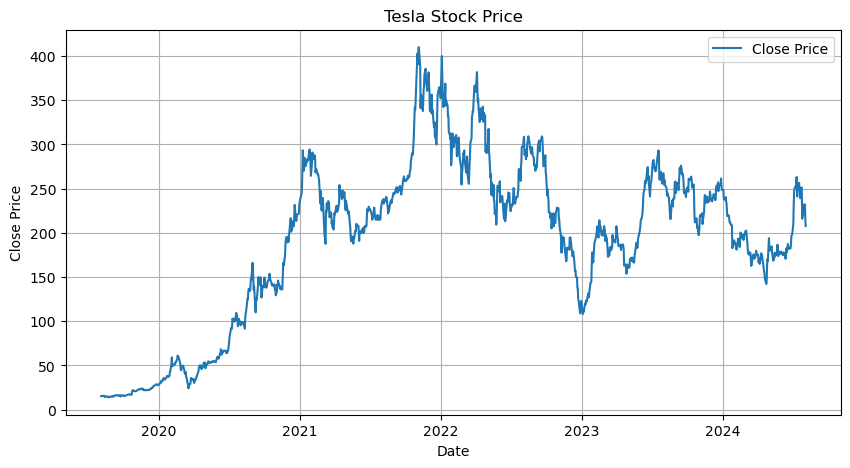

In [132]:
# Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="5y")

# Plot Tesla stock data
plot_stock_data(tesla_data, 'Tesla Stock Price')
plot_stock_data_plotly(tesla_data, 'Tesla Stock Price (Plotly)')

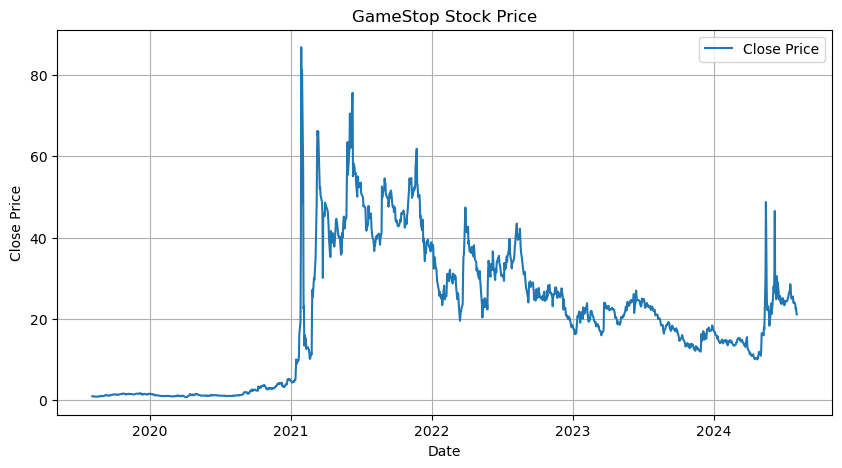

In [133]:
# Extract GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="5y")

# Plot GameStop stock data
plot_stock_data(gme_data, 'GameStop Stock Price')
plot_stock_data_plotly(gme_data, 'GameStop Stock Price (Plotly)')